TODO:

Data augmentation, Prettier ui


In [17]:
%autosave 60

Autosaving every 60 seconds


In [315]:
import tensorflow as tf
from tensorflow import keras
from tensorflow import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [316]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image

In [317]:
print(tf.__version__)

1.11.0


In [318]:
dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (validation_images, validation_labels) = dataset.load_data()

In [319]:
print(train_images[:2])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [320]:
train_images.shape

(60000, 28, 28)

In [321]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [322]:
train_labels.shape

(60000,)

In [323]:
print(validation_images.shape)
validation_labels.shape

(10000, 28, 28)


(10000,)

In [324]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

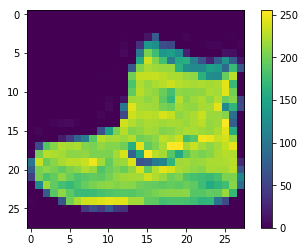

In [325]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

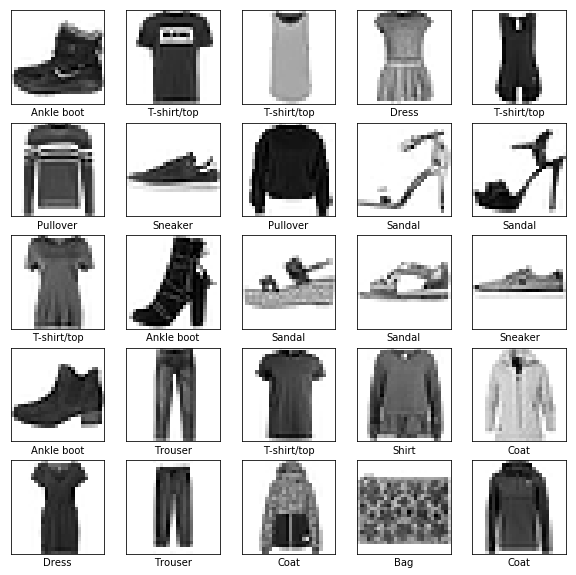

In [326]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])

In [327]:
def plotImages( images_arr, n_images=4):
    fig, axes = plt.subplots(n_images, n_images, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        if img.ndim != 2:
            img = img.reshape((28,28))
        ax.imshow( img, cmap="Greys_r")
        ax.set_xticks(())
        ax.set_yticks(())
    plt.tight_layout()

In [328]:
train_images = train_images / 255.0
validation_images = validation_images / 255.0

In [329]:
train_images = train_images.reshape((-1, 28, 28, 1))
validation_images = validation_images.reshape((-1, 28, 28, 1))
train_images.shape

(60000, 28, 28, 1)

In [330]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [331]:
model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [332]:
generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.08,
            height_shift_range=0.08, shear_range=0.15, zoom_range=0.1,
            channel_shift_range=10., horizontal_flip=True)
generator.fit(train_images)

In [333]:
#model.fit(train_images, train_labels, epochs=10)
batch_size = 16
epochs = 40
history = model.fit_generator(generator.flow(train_images,train_labels, batch_size=batch_size),
                              epochs = epochs, validation_data = (validation_images,validation_labels),
                              verbose = 2, steps_per_epoch=train_images.shape[0] // batch_size)

Epoch 1/40
 - 16s - loss: 2.2633 - acc: 0.1224 - val_loss: 1.0780 - val_acc: 0.5907
Epoch 2/40
 - 15s - loss: 2.2288 - acc: 0.1343 - val_loss: 0.9573 - val_acc: 0.6612
Epoch 3/40
 - 15s - loss: 2.2238 - acc: 0.1354 - val_loss: 0.9207 - val_acc: 0.6842
Epoch 4/40
 - 15s - loss: 2.2143 - acc: 0.1387 - val_loss: 1.1569 - val_acc: 0.6495
Epoch 5/40
 - 15s - loss: 2.2128 - acc: 0.1392 - val_loss: 0.9377 - val_acc: 0.6789
Epoch 6/40
 - 15s - loss: 2.2106 - acc: 0.1385 - val_loss: 0.8925 - val_acc: 0.7089
Epoch 7/40
 - 15s - loss: 2.2058 - acc: 0.1428 - val_loss: 0.8671 - val_acc: 0.7129
Epoch 8/40
 - 15s - loss: 2.2100 - acc: 0.1372 - val_loss: 1.1361 - val_acc: 0.6761
Epoch 9/40
 - 15s - loss: 2.2034 - acc: 0.1439 - val_loss: 0.9065 - val_acc: 0.7082
Epoch 10/40
 - 15s - loss: 2.2028 - acc: 0.1437 - val_loss: 0.8624 - val_acc: 0.7342
Epoch 11/40
 - 15s - loss: 2.2046 - acc: 0.1419 - val_loss: 0.8079 - val_acc: 0.7284
Epoch 12/40
 - 15s - loss: 2.2032 - acc: 0.1396 - val_loss: 0.9215 - val_a

KeyboardInterrupt: 

In [ ]:
validation_loss, validation_acc = model.evaluate(validation_images, validation_labels)

In [ ]:
validation_loss

In [ ]:
validation_acc

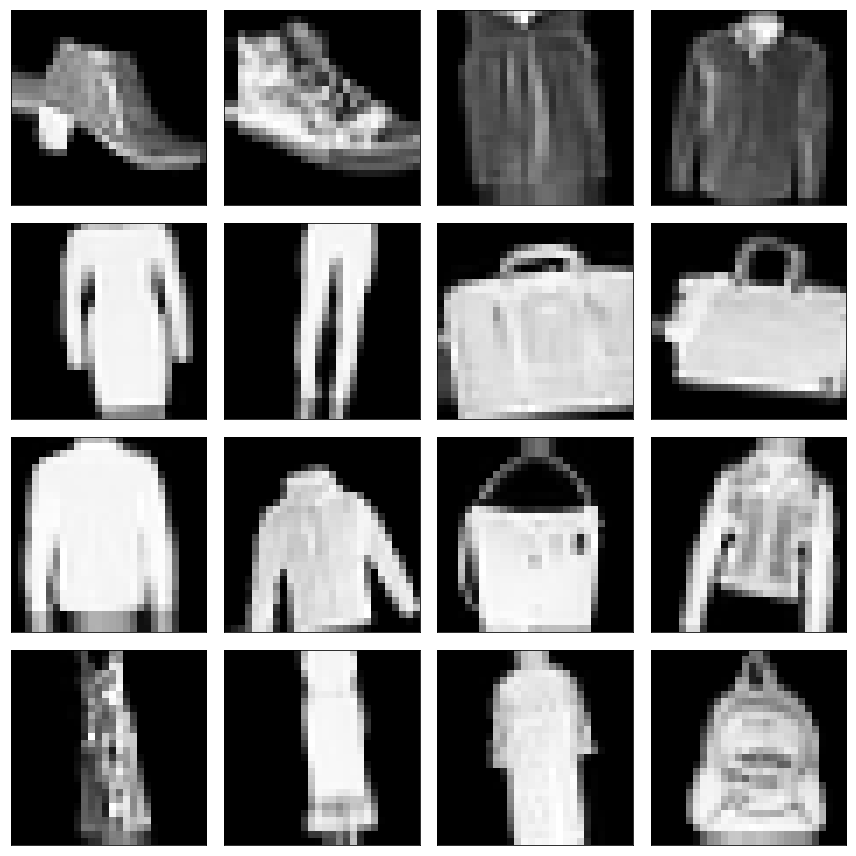

In [116]:
aug_training_images, _ = next(generator.flow((train_images), train_labels, batch_size=4*4))
plotImages(aug_training_images)

In [117]:
generator.fit(validation_images, augment=True)

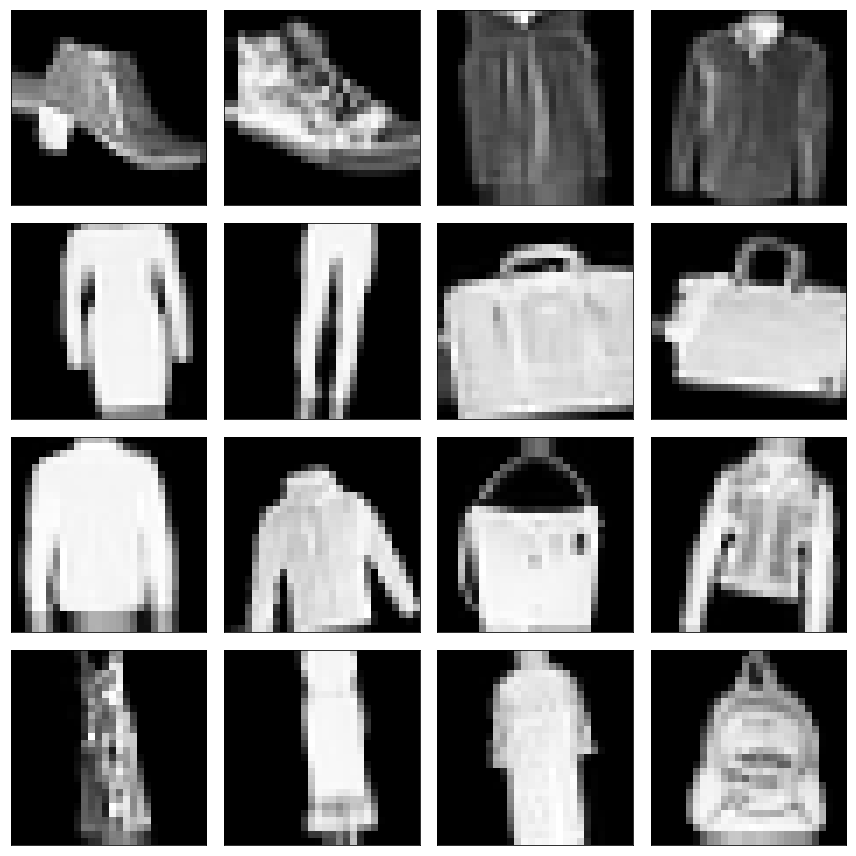

In [120]:
aug_validation_images, _ = next(generator.flow((validation_images), validation_labels, batch_size=16))
plotImages(aug_training_images)

In [122]:
aug_training_images[0]

array([[[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        [0

In [ ]:
train_images = aug_training_images


In [57]:
#model.compile(optimizer=tf.train.AdamOptimizer(), 
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])

In [59]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 107us/step - loss: 0.5011 - acc: 0.8230
Epoch 2/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.3758 - acc: 0.8648
Epoch 3/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.3380 - acc: 0.8780
Epoch 4/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.3142 - acc: 0.8859
Epoch 5/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.2949 - acc: 0.8915
Epoch 6/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.2813 - acc: 0.8963
Epoch 7/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2702 - acc: 0.8989
Epoch 8/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2604 - acc: 0.9022
Epoch 9/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.2509 - acc: 0.9057
Epoch 10/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.2414 - a

In [61]:
validation_loss

0.33987973628044127

In [62]:
validation_acc

0.8776

In [63]:
predictions = model.predict(validation_images)

In [64]:
first_prediction = np.argmax(predictions[0])
first_prediction

9

In [65]:
classes[9]

'Ankle boot'

# Custom self generated images:

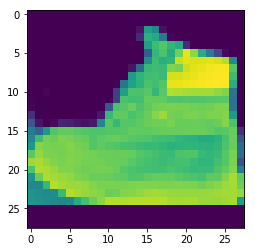

In [187]:
image = Image.open('result-2-2.png')
img_data = np.asarray(image)
plt.imshow(img_data)

In [188]:
img_data.shape

(28, 28)

In [189]:
img = np.expand_dims(img_data, 0)
img = img / 255.0

In [190]:
img.shape

(1, 28, 28)

In [191]:
prediction_custom = model.predict(img)

In [192]:
prediction_custom[0]

array([4.0159096e-12, 1.5278023e-10, 5.1929052e-14, 1.6603682e-12,
       2.0028791e-11, 4.4698529e-05, 8.5720537e-12, 5.6813337e-04,
       1.9201484e-04, 9.9919516e-01], dtype=float32)

In [193]:
prediction = np.argmax(prediction_custom[0])
classes[prediction]

'Ankle boot'

In [194]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

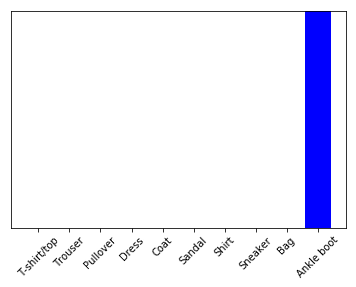

In [195]:
plot_value_array(0, prediction_custom, validation_labels)
_ = plt.xticks(range(10), classes, rotation=45)

In [138]:
import tensorflowjs as tfjs

Using TensorFlow backend.


In [150]:
tfjs.converters.save_keras_model(model, './')